In [21]:
# neural network with keras tutorial
from tensorflow import keras
from tensorflow.keras import layers
import keras.optimizers as opt
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

In [3]:
# define the keras model
model = Sequential(name='My_sequential')
model.add(Dense(12, input_dim=8, activation='relu', name='layer1'))
model.add(Dense(8, activation='relu', name='layer2'))
model.add(Dense(1, activation='sigmoid', name='output_layer'))

In [4]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
# fit the keras model on the dataset. MINI-BATCH GRADIENT DESCENT
history = model.fit(X, y, epochs=150, batch_size=10)

2021-09-27 15:55:47.668461: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150
77/77 [==============================] - 1s 1ms/step - loss: 25.1029 - accuracy: 0.3919
Epoch 2/150
77/77 [==============================] - 0s 1ms/step - loss: 3.8805 - accuracy: 0.5794
Epoch 3/150
77/77 [==============================] - 0s 1ms/step - loss: 1.0902 - accuracy: 0.6549
Epoch 4/150
77/77 [==============================] - 0s 1ms/step - loss: 0.9081 - accuracy: 0.6458
Epoch 5/150
77/77 [==============================] - 0s 1ms/step - loss: 0.8349 - accuracy: 0.6432
Epoch 6/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7748 - accuracy: 0.6445
Epoch 7/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7209 - accuracy: 0.6458
Epoch 8/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.6471
Epoch 9/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6595 - accuracy: 0.6471
Epoch 10/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6516 - accuracy: 0.6458
Epoch 11

77/77 [==============================] - 0s 1ms/step - loss: 0.5866 - accuracy: 0.6549
Epoch 84/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5875 - accuracy: 0.6549
Epoch 85/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5836 - accuracy: 0.6549
Epoch 86/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5842 - accuracy: 0.6549
Epoch 87/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5863 - accuracy: 0.6549
Epoch 88/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5850 - accuracy: 0.6549
Epoch 89/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5858 - accuracy: 0.6549
Epoch 90/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5881 - accuracy: 0.6549
Epoch 91/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5833 - accuracy: 0.6549
Epoch 92/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5873 - accuracy: 0.6549
Epoch 93/150


In [6]:
# fit the keras model on the dataset. BATCH GRADIENT DESCENT
history = model.fit(X, y, epochs=150, batch_size=len(dataset), verbose=0)

In [10]:
# fit the keras model on the dataset. SGT (STOCHASTIC GRADIENT DESCENT)
history = model.fit(X, y, epochs=150, batch_size=1, verbose=0)

Epoch 1/150
768/768 [==============================] - 1s 975us/step - loss: 1.4636 - accuracy: 0.5833
Epoch 2/150
768/768 [==============================] - 1s 965us/step - loss: 0.6770 - accuracy: 0.6523
Epoch 3/150
768/768 [==============================] - 1s 980us/step - loss: 0.6577 - accuracy: 0.6471
Epoch 4/150
768/768 [==============================] - 1s 1ms/step - loss: 0.6577 - accuracy: 0.6432
Epoch 5/150
768/768 [==============================] - 1s 994us/step - loss: 0.6567 - accuracy: 0.6419
Epoch 6/150
768/768 [==============================] - 1s 943us/step - loss: 0.6443 - accuracy: 0.6523
Epoch 7/150
768/768 [==============================] - 1s 1ms/step - loss: 0.6399 - accuracy: 0.6510
Epoch 8/150
768/768 [==============================] - 1s 940us/step - loss: 0.6224 - accuracy: 0.6641
Epoch 9/150
768/768 [==============================] - 1s 1ms/step - loss: 0.6115 - accuracy: 0.6706
Epoch 10/150
768/768 [==============================] - 1s 949us/step - loss: 0

In [7]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


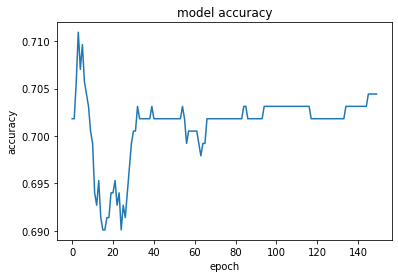

In [8]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [9]:
# fit the keras model on the dataset. MINI-BATCH GRADIENT DESCENT
model.fit(X, y, epochs=150, batch_size=10, verbose=0)

In [10]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 72.92


In [11]:
# fit the keras model on the dataset without progress bars
model.fit(X, y, epochs=150, batch_size=10, verbose=0)
# evaluate the keras model
_, accuracy = model.evaluate(X, y, verbose=0)

In [12]:
# make probability predictions with the model
predictions = model.predict(X)
classes_x=np.argmax(predictions,axis=1)
# round predictions 
rounded = [round(x[0]) for x in predictions]

In [13]:
# summarize the first 5 cases/dataset
for i in range(len(dataset)):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 0 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 0 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 0 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 0 (expected 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => 0 (expected 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] => 0 (expected 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] => 0 (expected 1)
[4.0, 110.0, 92.0, 0.0, 0.0, 37.6, 0.191, 30.0] => 0 (expected 0)
[10.0, 168.0, 74.0, 0.0, 0.0, 38.0, 0.537, 34.0] => 0 (expected 1)
[10.0, 139.0, 80.0, 0.0, 0.0, 27.1, 1.441, 57.0] => 0 (expected 0)
[1.0, 189.0, 60.0, 23.0, 846.0, 30.1, 0.398, 59.0] => 0 (expected 1)
[5.0, 166.0, 72.0, 19.0, 175.0, 25.8, 0.587, 51.0] => 0 (expect

In [34]:
#2nd variant : Linear Regression. Predicting age
X = dataset[:,0:7]
y = dataset[:,7]

In [35]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

In [36]:
# compile the keras model
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer = opt, metrics=['mae'])

In [37]:
dataset.shape

(768, 9)

In [38]:
# fit the keras model on the dataset
model.fit(X, y, epochs=50, batch_size=10)

Epoch 1/50
77/77 [==============================] - 1s 1ms/step - loss: 854.6990 - mae: 22.8532
Epoch 2/50
77/77 [==============================] - 0s 1ms/step - loss: 127.4170 - mae: 8.4935
Epoch 3/50
77/77 [==============================] - 0s 2ms/step - loss: 111.6466 - mae: 8.0163
Epoch 4/50
77/77 [==============================] - 0s 1ms/step - loss: 105.6954 - mae: 7.6089
Epoch 5/50
77/77 [==============================] - 0s 1ms/step - loss: 99.5693 - mae: 7.3608
Epoch 6/50
77/77 [==============================] - 0s 2ms/step - loss: 100.2642 - mae: 7.3806
Epoch 7/50
77/77 [==============================] - 0s 1ms/step - loss: 97.5065 - mae: 7.3737
Epoch 8/50
77/77 [==============================] - 0s 1ms/step - loss: 92.7602 - mae: 7.0347
Epoch 9/50
77/77 [==============================] - 0s 1ms/step - loss: 99.2309 - mae: 7.3109
Epoch 10/50
77/77 [==============================] - 0s 1ms/step - loss: 90.1289 - mae: 6.8579
Epoch 11/50
77/77 [==============================] - 

In [39]:
# make probability predictions with the model
predictions = model.predict(X)
classes_x=np.argmax(predictions,axis=1)
# round predictions 
rounded = [round(x[0]) for x in predictions]

In [40]:
# summarize the first 5 cases/dataset
for i in range(len(dataset)):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627] => 31 (expected 50)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351] => 20 (expected 31)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672] => 38 (expected 32)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167] => 18 (expected 21)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288] => 18 (expected 33)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201] => 31 (expected 30)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248] => 19 (expected 26)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134] => 29 (expected 29)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158] => 27 (expected 53)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232] => 46 (expected 54)
[4.0, 110.0, 92.0, 0.0, 0.0, 37.6, 0.191] => 33 (expected 30)
[10.0, 168.0, 74.0, 0.0, 0.0, 38.0, 0.537] => 39 (expected 34)
[10.0, 139.0, 80.0, 0.0, 0.0, 27.1, 1.441] => 42 (expected 57)
[1.0, 189.0, 60.0, 23.0, 846.0, 30.1, 0.398] => 37 (expected 59)
[5.0, 166.0, 72.0, 19.0, 175.0, 25.8, 0.587] => 30 (expected 51)
[7.0, 100.0, 0.0, 0.0, 0.0, 30.0, 0.484] => 25 (expect